## Open Street map
### Using open street map for download geographic objects

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 28 18:36:00 2019

@author: mor
"""

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import json
import folium
import datetime
import tempfile 
import webbrowser, os
import time
import os
import json
import folium
import geopandas as gpd

In [2]:
BASE = os.getcwd()
DATA = os.path.join(BASE,'data')


### This code use open street map API
#### https://wiki.openstreetmap.org/wiki/Nominatim 
#### https://wiki.openstreetmap.org/wiki/Zoom_levels
#### http://nominatim.org/release-docs/latest/


In [3]:
import sys
from termcolor import colored, cprint


def error_print(text):
    text = '*****\nError empty\n' + text + '\n*****'
    text = colored(text, 'red')
    print(text)


#check if json is legit geojson
def check_json(file):
    try:
        f = file['features']
    except:
        f = {}

    if not f:
        error_print(str(file))
        return None
    else:
        return file


#Get geojson object by coordinates
def get_polygon_by_lat_long(lat, lon, zoom=11, sleep=1.5):
    lat = str(lat)
    lon = str(lon)
    zoom = str(zoom)
    url = 'https://nominatim.openstreetmap.org/reverse?format=geojson&lat=' + lat + '&lon=' + lon + '&polygon_geojson=1&zoom=' + zoom
    time.sleep(sleep)
    r = requests.get(url)
    return check_json(r.json())


#Get geojson object by city name
def get_polygon_by_city(city, sleep=1.5):
    city = str(city)
    url = 'https://nominatim.openstreetmap.org/search/?city=' + city + '&format=geojson&limit=1&polygon_geojson=1'
    time.sleep(sleep)
    r = requests.get(url)
    j = r.json()
    if not check_json(j):
        return None
    return j


#Get geojson Node by coordinates
def get_node_by_lat_long(lat, lon, sleep=1.5):
    lat = str(lat)
    lon = str(lon)
    url = 'https://nominatim.openstreetmap.org/reverse?format=geojson&lat=' + lat + '&lon=' + lon + '&osm_type=N'
    time.sleep(sleep)
    r = requests.get(url)
    return check_json(r.json())


#Get geojson object by osm_type (N - node, W - way, R - relation)
def get_geojson_by_osmID(osm_id, osm_type, sleep=1.5):
    osm_id = str(osm_id)
    url = 'https://nominatim.openstreetmap.org/reverse?format=geojson&osm_id=' + osm_id + '&osm_type=' + osm_type + '&polygon_geojson=1'
    time.sleep(sleep)
    r = requests.get(url)
    return check_json(r.json())

In [4]:
data = get_polygon_by_city('dsds')

*****
Error empty
{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': []}
*****



### Examples using API


In [5]:
# ID of Way type from open street map
wid = str(650788981)

##example Way data
data1 = get_geojson_by_osmID(wid, 'W')
print('Way data\n')
print(data1)
print('\n\n')

Way data

{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': [{'type': 'Feature', 'properties': {'place_id': 216734494, 'osm_type': 'way', 'osm_id': 650788981, 'place_rank': 19, 'category': 'place', 'type': 'village', 'importance': 0.275, 'addresstype': 'place', 'name': 'ראש הנקרה', 'display_name': 'ראש הנקרה, מועצה אזורית מטה אשר, מחוז הצפון, ישראל', 'address': {'village': 'ראש הנקרה', 'city': 'מועצה אזורית מטה אשר', 'state': 'מחוז הצפון', 'country': 'ישראל', 'country_code': 'il'}}, 'bbox': [35.1097884, 33.0830268, 35.1217446, 33.0899304], 'geometry': {'type': 'Polygon', 'coordinates': [[[35.1097884, 33.0865436], [35.1098099, 33.0863099], [35.1100588, 33.0856229], [35.1101961, 33.0853173], [35.1104796, 33.0850406], [35.110724, 33.0849507], [35.1109689, 33.0849471], [35.1112819, 33.0851051], [35.1116383, 33.0851051], [35.1123422, 33.0850586], [35.112977, 33.0849687], [35.1130717, 33.0851485], [35.1138141, 33.08

In [6]:
# ID of Relation type from open street map
rid = str(1380226)

#example Relation data
data2 = get_geojson_by_osmID(rid, 'R')
print('Relation data\n')
print(data2)
print('\n\n')

Relation data

{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': [{'type': 'Feature', 'properties': {'place_id': 235455287, 'osm_type': 'relation', 'osm_id': 1380226, 'place_rank': 16, 'category': 'boundary', 'type': 'administrative', 'importance': 0.5535470946106127, 'addresstype': 'boundary', 'name': 'עפולה', 'display_name': 'עפולה, מחוז הצפון, 1839010, ישראל', 'address': {'city': 'עפולה', 'state': 'מחוז הצפון', 'postcode': '1839010', 'country': 'ישראל', 'country_code': 'il'}}, 'bbox': [35.2474199, 32.5760736, 35.3742374, 32.6418862], 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[35.2474199, 32.6057459], [35.2502356, 32.6057455], [35.2502349, 32.6071831], [35.253136, 32.6080291], [35.253136, 32.6048169], [35.2579066, 32.604584], [35.25995, 32.6045803], [35.2599534, 32.6058658], [35.2603925, 32.6077213], [35.2599585, 32.6087519], [35.2599545, 32.6098024], [35.2578249, 32.6097969], [35.2578219, 32.61

In [7]:
##example Node data
data3=get_node_by_lat_long(31.2481114, 34.8121990)# cinema globus max Beer Sheva
print('node data\n')
print(data3)

node data

{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': [{'type': 'Feature', 'properties': {'place_id': 10716401, 'osm_type': 'node', 'osm_id': 1004424490, 'place_rank': 30, 'category': 'amenity', 'type': 'cinema', 'importance': 0, 'addresstype': 'amenity', 'name': 'גלובוס מקס', 'display_name': 'גלובוס מקס, יצחק נפחא, שכונה ג, באר שבע, מחוז הדרום, no, ישראל', 'address': {'cinema': 'גלובוס מקס', 'road': 'יצחק נפחא', 'suburb': 'שכונה ג', 'city': 'באר שבע', 'state': 'מחוז הדרום', 'postcode': 'no', 'country': 'ישראל', 'country_code': 'il'}}, 'bbox': [34.812099, 31.2480114, 34.812299, 31.2482114], 'geometry': {'type': 'Point', 'coordinates': [34.812199, 31.2481114]}}]}


### Save geojson file 
###### Geojson is a known format for geographical data.
###### Using Geopandas for  easier working with geospatial data .

In [8]:
#save geojson file. default save temporary file
#return path
def save_geojson(data, filename=None , path=DATA):
    tmp=tempfile.NamedTemporaryFile(delete=False)
    if filename:
        jpath=os.path.join(path,filename+'.geojson')
    else:
        jpath=tmp.name+'.geojson'
    with open(jpath, 'w') as outfile:
        json.dump(data, outfile)
    return jpath


jpath = save_geojson(data1)
g = gpd.read_file(jpath)
print(g.head())


    place_id osm_type     osm_id  place_rank category     type  importance  \
0  216734494      way  650788981          19    place  village       0.275   

  addresstype       name                                       display_name  \
0       place  ראש הנקרה  ראש הנקרה, מועצה אזורית מטה אשר, מחוז הצפון, י...   

                                             address  \
0  {'village': 'ראש הנקרה', 'city': 'מועצה אזורית...   

                                            geometry  
0  POLYGON ((35.1097884 33.0865436, 35.1098099 33...  


In [9]:
gdf = gpd.GeoDataFrame.from_features(data2)
print(gdf.head())

                                             address addresstype  category  \
0  {'city': 'עפולה', 'state': 'מחוז הצפון', 'post...    boundary  boundary   

                        display_name  \
0  עפולה, מחוז הצפון, 1839010, ישראל   

                                            geometry  importance   name  \
0  (POLYGON ((35.2474199 32.6057459, 35.2502356 3...    0.553547  עפולה   

    osm_id  osm_type   place_id  place_rank            type  
0  1380226  relation  235455287          16  administrative  


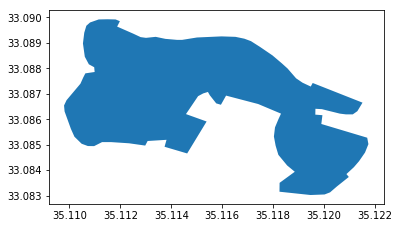

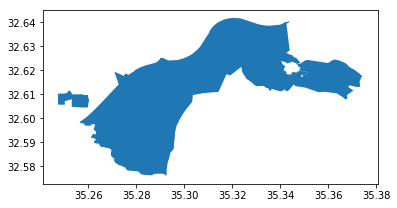

In [10]:
%matplotlib inline
g.plot()
gdf.plot()

In [11]:
#test polygon
lat=str(32.2876)
lon=str(34.8443)

data=get_polygon_by_lat_long(lat,lon)
print(data)

{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': [{'type': 'Feature', 'properties': {'place_id': 235414819, 'osm_type': 'relation', 'osm_id': 1383391, 'place_rank': 16, 'category': 'boundary', 'type': 'administrative', 'importance': 0.5765579669703763, 'addresstype': 'boundary', 'name': 'נתניה', 'display_name': 'נתניה, מחוז המרכז, 42***, ישראל', 'address': {'city': 'נתניה', 'state': 'מחוז המרכז', 'postcode': '42***', 'country': 'ישראל', 'country_code': 'il'}}, 'bbox': [34.8247416, 32.2549044, 34.89601, 32.3534834], 'geometry': {'type': 'Polygon', 'coordinates': [[[34.8247416, 32.2607342], [34.8286616, 32.2597746], [34.8286573, 32.2597351], [34.8289025, 32.2597034], [34.8292466, 32.2596588], [34.8294837, 32.2597342], [34.8311041, 32.2593493], [34.831203, 32.2592909], [34.8321299, 32.259144], [34.8317726, 32.2585751], [34.8318945, 32.2583393], [34.8321434, 32.2579912], [34.8320788, 32.2576241], [34.8314342, 32.

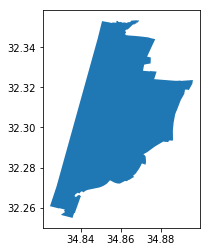

In [12]:
gpd.GeoDataFrame.from_features(data).plot()

In [13]:
city='נתניה'

data=get_polygon_by_city(city)
print(data)

{'type': 'FeatureCollection', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'features': [{'type': 'Feature', 'properties': {'place_id': 235414819, 'osm_type': 'relation', 'osm_id': 1383391, 'display_name': 'נתניה, מחוז המרכז, 42***, ישראל', 'place_rank': 16, 'category': 'boundary', 'type': 'administrative', 'importance': 0.6865579669703763, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}, 'bbox': [34.8247416, 32.2549044, 34.89601, 32.3534834], 'geometry': {'type': 'Polygon', 'coordinates': [[[34.8247416, 32.2607342], [34.8286616, 32.2597746], [34.8286573, 32.2597351], [34.8289025, 32.2597034], [34.8292466, 32.2596588], [34.8294837, 32.2597342], [34.8311041, 32.2593493], [34.831203, 32.2592909], [34.8321299, 32.259144], [34.8317726, 32.2585751], [34.8318945, 32.2583393], [34.8321434, 32.2579912], [34.8320788, 32.2576241], [34.8314342, 32.2573685], [34.830756, 32.2568306], [34.8301985, 32.2564727],

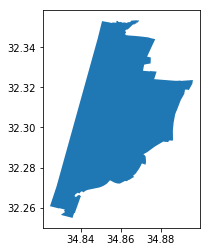

In [14]:
gpd.GeoDataFrame.from_features(data).plot()